# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
# input dataset/libraries
#!pip install palmerpenguins
from palmerpenguins import load_penguins
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
#dummify vars
#Pandas
#double brackets to get dataframe on species variable
#T/F same thing as 1/0
pd.get_dummies(penguins[['species']])

#does for entire dataset, but not good b/c it will do every col that is categorical (specifically bad for Name variable)
penguins_dumb = pd.get_dummies(penguins)


KeyError: "None of [Index(['species'], dtype='object')] are in the [columns]"

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [ ]:
# Code Here
#not supposed to do this, but its okay for practice activities
penguins_clean = penguins_dumb.dropna()

penguins_clean.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,2007,True,False,False,False,False,True,False,True


**Model 1**

In [ ]:
#choose predictor/response
X = penguins_clean[['bill_length_mm', 'sex_female']]
y = penguins_clean['bill_depth_mm']


**Model 2**

In [ ]:
X = penguins_clean[['bill_length_mm', 'body_mass_g', 'flipper_length_mm']]
y = penguins_clean['bill_depth_mm']

**Model 3**

In [ ]:
X = penguins_clean[['bill_length_mm', 'body_mass_g', 'flipper_length_mm', 'species_Adelie']]
y = penguins_clean['bill_depth_mm']

**Model 4**

In [ ]:
X = penguins_clean[['bill_length_mm', 'body_mass_g', 'flipper_length_mm', 'species_Adelie', 'island_Dream', 'sex_female']]
y = penguins_clean['bill_depth_mm']

In [ ]:
#run the linear regression info based on the values assigned in the model

#use linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#train/split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#fit models using training sets
lr_fit = lr.fit(X_train, y_train)

#use the fitted models to get predicted values for the test data
y_pred_lr = lr_fit.predict(X_test)

#use MSE and compute for test data predictions to access accuracy
from sklearn.metrics import r2_score, mean_squared_error

#train MSE
#need to use fitted model to predict vals of train dataset
y_pred_lr_train = lr_fit.predict(X_train)
MSE_train = mean_squared_error(y_train, y_pred_lr_train)

#test MSE
MSE_test = mean_squared_error(y_test, y_pred_lr)

#train R^2
R_train = r2_score(y_train, y_pred_lr_train)

#test R^2
R_test = r2_score(y_test, y_pred_lr)

print("MSE_train: ", MSE_train, " MSE_TEST: ", MSE_test, " R^2Train: ", R_train, " R^2Test: ", R_test)

MSE_train:  2.2146731133104165  MSE_TEST:  3.0359226684152145  R^2Train:  0.3978907765491315  R^2Test:  0.311074494096206


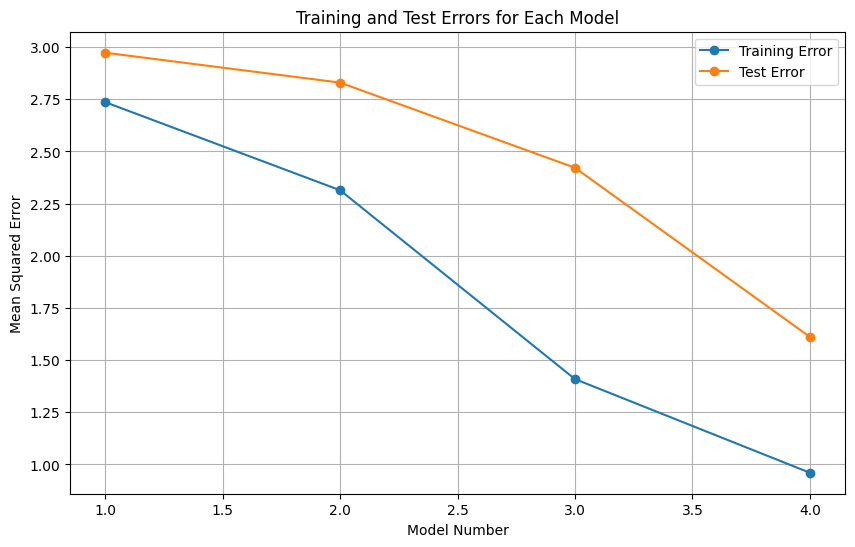

In [ ]:
#Create plots with training and test error plotted for each model
